<a href="https://colab.research.google.com/github/jbshirk/DS-Unit-1-Sprint-2-Data-Wrangling-and-Storytelling/blob/master/module4-sequence-your-narrative/Joseph_Shirk_LS_DS_124_Sequence_your_narrative_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

## Save to:
  module4-sequence-your-narrative/

# Sequence Your Narrative - Assignment

Today we will create a sequence of visualizations inspired by [Hans Rosling's 200 Countries, 200 Years, 4 Minutes](https://www.youtube.com/watch?v=jbkSRLYSojo).

Using this [data from Gapminder](https://github.com/open-numbers/ddf--gapminder--systema_globalis/):
- [Income Per Person (GDP Per Capital, Inflation Adjusted) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv)
- [Life Expectancy (in Years) by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv)
- [Population Totals, by Geo & Time](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv)
- [Entities](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv)
- [Concepts](https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv)

Objectives
- sequence multiple visualizations
- combine qualitative anecdotes with quantitative aggregates

Links
- [Hans Rosling’s TED talks](https://www.ted.com/speakers/hans_rosling)
- [Spiralling global temperatures from 1850-2016](https://twitter.com/ed_hawkins/status/729753441459945474)
- "[The Pudding](https://pudding.cool/) explains ideas debated in culture with visual essays."
- [A Data Point Walks Into a Bar](https://lisacharlotterost.github.io/2016/12/27/datapoint-in-bar/): a thoughtful blog post about emotion and empathy in data storytelling

# ASSIGNMENT
 

1.   Replicate the Lesson Code
2.   Take it further by using the same gapminder dataset to create a sequence of visualizations that combined tell a story of your choosing.

Get creative! Use text annotations to call out specific countries, maybe: change how the points are colored, change the opacity of the points, change their sized, pick a specific time window. Maybe only work with a subset of countries, change fonts, change background colors, etc. make it your own!

## Plan

Variables to visual encodings
- x : Income (which should rightly be called Purchasing Power)
- y: Lifespan (which should rightly be called Longevity)
- color : Region category
- dot size : Population
- time slice for animated GIF, etc : Year
- annotations : Country

Qualitative
- Editorial - I wiould like to add popup annotations / alt-text for 'Regime' : Stalin, Mao, Roosevelt, Churchill, etc

Columns

Year | Country | Region | PurchPower | Longevity | Population

In [1]:
# check seaborn version
import seaborn as sns
sns.__version__

'0.9.0'

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [0]:
income = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--income_per_person_gdppercapita_ppp_inflation_adjusted--by--geo--time.csv')

In [0]:
population = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--population_total--by--geo--time.csv')

In [0]:
lifespan = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--datapoints--life_expectancy_years--by--geo--time.csv')

In [0]:
# names of countries and regions
entities = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--entities--geo--country.csv')

In [0]:
concepts = pd.read_csv('https://raw.githubusercontent.com/open-numbers/ddf--gapminder--systema_globalis/master/ddf--concepts.csv')

In [8]:
income.shape, lifespan.shape, population.shape, entities.shape, concepts.shape

((46513, 3), (44370, 3), (59297, 3), (273, 33), (590, 16))

There are less than about 44,000 intersections for merge


In [9]:
# pppp = purchasing power per person
income.rename(columns={'income_per_person_gdppercapita_ppp_inflation_adjusted' : 'pppp'}, inplace=True)
income.head()

,geo,time,pppp
0,afg,1800,603
1,afg,1801,603
2,afg,1802,603
3,afg,1803,603
4,afg,1804,603


In [10]:
income.sample(9)

,geo,time,pppp
18872,irl,1874,3079
12517,egy,2026,13196
42292,tun,1917,1184
31203,npl,1914,901
24850,lux,1827,1583
16877,gtm,1807,858
22182,kna,1810,1166
17119,guy,1808,1215
6716,bwa,2009,12499


In [11]:
lifespan.rename(columns={'life_expectancy_years' : 'longevity'}, inplace=True)
lifespan.head()

,geo,time,longevity
0,abw,1800,34.42
1,abw,1801,34.42
2,abw,1802,34.42
3,abw,1803,34.42
4,abw,1804,34.42


In [12]:
population.rename(columns={'population_total' : 'pop'}, inplace=True)
population.head()

,geo,time,pop
0,afg,1800,3280000
1,afg,1801,3280000
2,afg,1802,3280000
3,afg,1803,3280000
4,afg,1804,3280000


In [0]:
entities.shape
pd.options.display.max_columns = 33
entities.rename(columns={'country':'geo', 'world_4region':'region4','world_6region':'region6'}, inplace=True)


In [0]:
entities.drop(columns=[
        'alt_5', 	'alternative_1', 	'alternative_2', 	'alternative_3', 	'alternative_4_cdiac',
         	'arb1', 	'arb2', 	'arb3', 	'arb4', 	'arb5', 	'arb6' 	], inplace=True)

In [15]:
entities.head()

,geo,g77_and_oecd_countries,gapminder_list,god_id,gwid,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,latitude,longitude,main_religion_2008,name,pandg,un_state,unicode_region_subtag,upper_case_name,region4,region6
0,abkh,others,Abkhazia,GE-AB,i0,NaN,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abkhazia,NaN,False,NaN,NaN,europe,europe_central_asia
1,abw,others,Aruba,AW,i12,high_income,True,AW,ABW,533.0,NaN,coastline,12.50000,-69.96667,christian,Aruba,NaN,False,AW,ARUBA,americas,america
2,afg,g77,Afghanistan,AF,i1,low_income,True,AF,AFG,4.0,NaN,landlocked,33.00000,66.00000,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
3,ago,g77,Angola,AO,i7,upper_middle_income,True,AO,AGO,24.0,NaN,coastline,-12.50000,18.50000,christian,Angola,ANGOLA,True,AO,ANGOLA,africa,sub_saharan_africa
4,aia,others,Anguilla,AI,i8,NaN,True,AI,AIA,660.0,NaN,coastline,18.21667,-63.05000,christian,Anguilla,NaN,False,AI,ANGUILLA,americas,america


In [0]:
df = pd.merge(income,lifespan)

In [0]:
df =pd.merge(df,population)

In [0]:
df = pd.merge(df,entities)

In [0]:
df.rename(columns={'time':'year','g77_and_oecd_countries':'g77oecd'},inplace=True)

In [20]:
df.head()

,geo,year,pppp,longevity,pop,g77oecd,gapminder_list,god_id,gwid,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,latitude,longitude,main_religion_2008,name,pandg,un_state,unicode_region_subtag,upper_case_name,region4,region6
0,afg,1800,603,28.21,3280000,g77,Afghanistan,AF,i1,low_income,True,AF,AFG,4.0,NaN,landlocked,33.0,66.0,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
1,afg,1801,603,28.20,3280000,g77,Afghanistan,AF,i1,low_income,True,AF,AFG,4.0,NaN,landlocked,33.0,66.0,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
2,afg,1802,603,28.19,3280000,g77,Afghanistan,AF,i1,low_income,True,AF,AFG,4.0,NaN,landlocked,33.0,66.0,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
3,afg,1803,603,28.18,3280000,g77,Afghanistan,AF,i1,low_income,True,AF,AFG,4.0,NaN,landlocked,33.0,66.0,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
4,afg,1804,603,28.17,3280000,g77,Afghanistan,AF,i1,low_income,True,AF,AFG,4.0,NaN,landlocked,33.0,66.0,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia


In [21]:
df.dtypes

geo                       object
year                       int64
pppp                       int64
longevity                float64
pop                        int64
g77oecd                   object
gapminder_list            object
god_id                    object
gwid                      object
income_groups             object
is--country                 bool
iso3166_1_alpha2          object
iso3166_1_alpha3          object
iso3166_1_numeric        float64
iso3166_2                 object
landlocked                object
latitude                 float64
longitude                float64
main_religion_2008        object
name                      object
pandg                     object
un_state                    bool
unicode_region_subtag     object
upper_case_name           object
region4                   object
region6                   object
dtype: object

In [22]:
mask_usa = df['name'] == 'United States'
usa = df[mask_usa]
usa.head()

,geo,year,pppp,longevity,pop,g77oecd,gapminder_list,god_id,gwid,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,latitude,longitude,main_religion_2008,name,pandg,un_state,unicode_region_subtag,upper_case_name,region4,region6
38028,usa,1800,2127,39.41,6801854,oecd,United States,US,i240,high_income,True,US,USA,840.0,NaN,coastline,39.76,-98.5,christian,United States,UNITED STATES,True,US,UNITED STATES,americas,america
38029,usa,1801,2167,39.41,6933517,oecd,United States,US,i240,high_income,True,US,USA,840.0,NaN,coastline,39.76,-98.5,christian,United States,UNITED STATES,True,US,UNITED STATES,americas,america
38030,usa,1802,2202,39.41,7067728,oecd,United States,US,i240,high_income,True,US,USA,840.0,NaN,coastline,39.76,-98.5,christian,United States,UNITED STATES,True,US,UNITED STATES,americas,america
38031,usa,1803,2166,39.41,7204538,oecd,United States,US,i240,high_income,True,US,USA,840.0,NaN,coastline,39.76,-98.5,christian,United States,UNITED STATES,True,US,UNITED STATES,americas,america
38032,usa,1804,2165,39.41,7343995,oecd,United States,US,i240,high_income,True,US,USA,840.0,NaN,coastline,39.76,-98.5,christian,United States,UNITED STATES,True,US,UNITED STATES,americas,america


#Visualization

In [0]:
import seaborn as sns

In [24]:
now = df[df['year'] == 2018]
now.head()

,geo,year,pppp,longevity,pop,g77oecd,gapminder_list,god_id,gwid,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,latitude,longitude,main_religion_2008,name,pandg,un_state,unicode_region_subtag,upper_case_name,region4,region6
218,afg,2018,1867,58.69,36373176,g77,Afghanistan,AF,i1,low_income,True,AF,AFG,4.0,NaN,landlocked,33.00,66.0,muslim,Afghanistan,AFGHANISTAN,True,AF,AFGHANISTAN,asia,south_asia
437,ago,2018,5846,65.19,30774205,g77,Angola,AO,i7,upper_middle_income,True,AO,AGO,24.0,NaN,coastline,-12.50,18.5,christian,Angola,ANGOLA,True,AO,ANGOLA,africa,sub_saharan_africa
656,alb,2018,12424,78.01,2934363,others,Albania,AL,i3,upper_middle_income,True,AL,ALB,8.0,NaN,coastline,41.00,20.0,muslim,Albania,ALBANIA,True,AL,ALBANIA,europe,europe_central_asia
922,are,2018,68231,76.89,9541615,g77,United Arab Emirates,AE,i238,high_income,True,AE,ARE,784.0,NaN,coastline,23.75,54.5,muslim,United Arab Emirates,UNITED ARAB EMIRATES,True,AE,UNITED ARAB EMIRATES,asia,middle_east_north_africa
1141,arg,2018,18942,76.97,44688864,g77,Argentina,AR,i10,upper_middle_income,True,AR,ARG,32.0,NaN,coastline,-34.00,-64.0,christian,Argentina,ARGENTINA,True,AR,ARGENTINA,americas,america


Text(40.81656250000002, 0.5, 'Longevity')

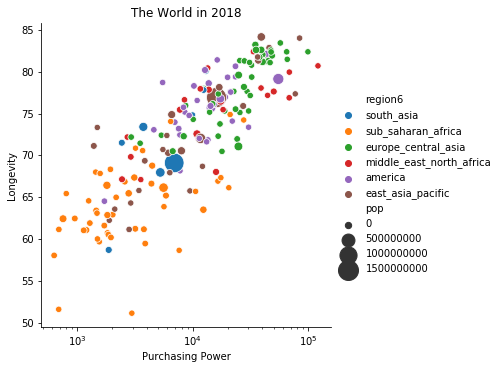

In [25]:
sns.relplot(x='pppp', 
            y='longevity', 
            hue='region6',
            size='pop',
            sizes=(40, 400),
            data=now);
plt.xscale('log')
#plt.ylim([30, 90])
plt.title('The World in 2018')
plt.xlabel("Purchasing Power")
plt.ylabel("Longevity")
#plt.legend(labels = "Regions & Population Density");

## Create a sequence of visualizations 
using the same gapminder dataset that combined tell a story of your choosing.

In [0]:
df2 = pd.merge(income,lifespan)
df2 = pd.merge(df2,population)
df2 = pd.merge(df2,entities)
df2.rename(columns={'time':'year','g77_and_oecd_countries':'g77oecd'},inplace=True)

In [27]:
pd.set_option('display.max_row', 500)
#df2[('name')].nunique
#df2.name.unique
entities.name.unique

<bound method Series.unique of 0                                          Abkhazia
1                                             Aruba
2                                       Afghanistan
3                                            Angola
4                                          Anguilla
5                             Akrotiri and Dhekelia
6                                             Åland
7                                           Albania
8                                           Andorra
9                              Netherlands Antilles
10                             United Arab Emirates
11                                        Argentina
12                                          Armenia
13                                   American Samoa
14                                       Antarctica
15                              Antigua and Barbuda
16                                        Australia
17                                          Austria
18                               

In [48]:
entities.region4.unique #why are these not unique?

<bound method Series.unique of 0        europe
1      americas
2          asia
3        africa
4      americas
5        europe
6        europe
7        europe
8        europe
9      americas
10         asia
11     americas
12       europe
13         asia
14       europe
15     americas
16         asia
17       europe
18       europe
19       africa
20       europe
21       africa
22       africa
23         asia
24       europe
25         asia
26     americas
27       europe
28       europe
29     americas
30     americas
31     americas
32       africa
33     americas
34     americas
35         asia
36         asia
37       africa
38       africa
39     americas
40         asia
41       europe
42       europe
43       europe
44     americas
45         asia
46       africa
47       africa
48       africa
49       africa
50         asia
51     americas
52       africa
53       africa
54     americas
55     americas
56         asia
57     americas
58       europe
59       europe
60       

In [49]:
 entities.region6.unique #also why are these not unique?

<bound method Series.unique of 0           europe_central_asia
1                       america
2                    south_asia
3            sub_saharan_africa
4                       america
5           europe_central_asia
6           europe_central_asia
7           europe_central_asia
8           europe_central_asia
9                       america
10     middle_east_north_africa
11                      america
12          europe_central_asia
13            east_asia_pacific
14                          NaN
15                      america
16            east_asia_pacific
17          europe_central_asia
18          europe_central_asia
19           sub_saharan_africa
20          europe_central_asia
21           sub_saharan_africa
22           sub_saharan_africa
23                   south_asia
24          europe_central_asia
25     middle_east_north_africa
26                      america
27          europe_central_asia
28          europe_central_asia
29                      america
30       

In [0]:
region6list = ['america','europe_central_asia','east_asia_pacific']
mask_region6 = df2['region6'].isin(region6list)
region4list = ['americas','europe','asia']
mask_region4 = df2['region4'].isin(region4list)

In [0]:
countrylist = ['United States','China','United Kingdom','Russia','USSR' 'East Germany','West Germany' ,'France']
# USSR, Germany, East Germany, West Germany don't appear
mask_countries = df2['name'].isin(countrylist)

In [0]:
years0099 = np.arange(1900,1999,5)
years3565 = np.arange(1935,1965,1)

In [0]:
mask_years0099 = df2['year'].isin(years0099)
mask_years3565 = df2['year'].isin(years3565)

In [75]:
#df2[mask_countries,mask_years80]
#df2 = df2[mask_countries] better not to do this permanently as it skews region analysis
df2 = df2[mask_years0099]
df2.tail()

,geo,year,pppp,longevity,pop,g77oecd,gapminder_list,god_id,gwid,income_groups,is--country,iso3166_1_alpha2,iso3166_1_alpha3,iso3166_1_numeric,iso3166_2,landlocked,latitude,longitude,main_religion_2008,name,pandg,un_state,unicode_region_subtag,upper_case_name,region4,region6
40393,zwe,1975,2725,59.07,6115370,g77,Zimbabwe,ZW,i257,low_income,True,ZW,ZWE,716.0,NaN,landlocked,-19.0,29.75,christian,Zimbabwe,ZIMBABWE,True,ZW,ZIMBABWE,africa,sub_saharan_africa
40398,zwe,1980,2413,60.43,7164172,g77,Zimbabwe,ZW,i257,low_income,True,ZW,ZWE,716.0,NaN,landlocked,-19.0,29.75,christian,Zimbabwe,ZIMBABWE,True,ZW,ZIMBABWE,africa,sub_saharan_africa
40403,zwe,1985,2449,63.09,8658857,g77,Zimbabwe,ZW,i257,low_income,True,ZW,ZWE,716.0,NaN,landlocked,-19.0,29.75,christian,Zimbabwe,ZIMBABWE,True,ZW,ZIMBABWE,africa,sub_saharan_africa
40408,zwe,1990,2593,61.69,10183113,g77,Zimbabwe,ZW,i257,low_income,True,ZW,ZWE,716.0,NaN,landlocked,-19.0,29.75,christian,Zimbabwe,ZIMBABWE,True,ZW,ZIMBABWE,africa,sub_saharan_africa
40413,zwe,1995,2476,53.69,11320346,g77,Zimbabwe,ZW,i257,low_income,True,ZW,ZWE,716.0,NaN,landlocked,-19.0,29.75,christian,Zimbabwe,ZIMBABWE,True,ZW,ZIMBABWE,africa,sub_saharan_africa


In [0]:
df3 = df2[mask_countries] 

In [129]:
# regime: Stalin, Hitler, Lenin, Churchill, FDR, Mao
# wars, conflicts, revolutions: 
# WWI : 1914 Kaiser Wilhelm II of Germany and Czar Nicholas II of Russia, Ottoman Empire
# Japan declares war on Germany. Russia declares war on the Ottoman Empire. 
# 1915 Allied forces join war
# 1917 October Revolution, Lenin
# 1918 Woodrow Wilson
# 1920 War ends

# this is going to be too ambitious, need to simplify

# https://en.wikipedia.org/wiki/Allied_leaders_of_World_War_I
# Russia : Czar Nicholas II 1894 - 1917 (overlaps with Lenin, Soviet revolution 1917)
# UK : King George V 1910-1936
# US : Woodrow Wilson 1913-1921
#regimes = {"regime"}

leader_cols = ['leader','year','title', 'country','region4','region6']
leaders = pd.DataFrame([ 
           ['Nicholas II',  1894,   'Emperor',        'Russia',         'asia',   'europe_central_asia'],
           ['Lenin',        1917,   'Revolutionary',  'Russia',         'asia',   'europe_central_asia'],
           ['George V',     1910,   'King',           'United Kingdom', 'europe', 'europe_central_asia'],
           ['Wilson',       1918,   'President',      'United States',  'americas','america'],
           ['Wilhelm II',   1914,   'Emperor',        'Germany',        'europe',  'europe_central_asia'],
           ['Yoshihito',    1912,   'Emepror',         'Japan',          'asia',   'asia_pacific'],
           ['George VI',    1936,   'King',           'United Kingdom',  'europe', 'europe_central_asia'],
           ['Churchill',    1940,   'Prime Minister', 'United Kingdom',  'europe', 'europe_central_asia'],
           ['Chiang Kai-shek',    1943,   'Generallissimo',         'China',          'asia',   'asia_pacific'],
           ['de Gaulle',    1944,   'Generallissimo', 'France',  'europe', 'europe_central_asia'],
           ['Stalin',    1941,   'Chairman', 'Russia',  'europe', 'europe_central_asia'],
           ['FDR',       1941,   'President',      'United States',  'americas','america'],
           ['Eisenhower',       1951,   'Supreme Commander',      'United States',  'americas','america'],
           ['Eisenhower',       1953,   'President',      'United States',  'americas','america'],
           ['Mao',          1949,   'Chairman',         'China',          'asia',   'asia_pacific'],
  ], columns = leader_cols    
  )
leaders.set_index('year')

,leader,title,country,region4,region6
year,,,,,
1894,Nicholas II,Emperor,Russia,asia,europe_central_asia
1917,Lenin,Revolutionary,Russia,asia,europe_central_asia
1910,George V,King,United Kingdom,europe,europe_central_asia
1918,Wilson,President,United States,americas,america
1914,Wilhelm II,Emperor,Germany,europe,europe_central_asia
1912,Yoshihito,Emepror,Japan,asia,asia_pacific
1936,George VI,King,United Kingdom,europe,europe_central_asia
1940,Churchill,Prime Minister,United Kingdom,europe,europe_central_asia
1943,Chiang Kai-shek,Generallissimo,China,asia,asia_pacific


Text(0, 0.5, 'Longevity')

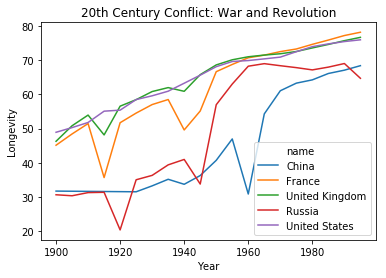

In [77]:
#plot df2
sns.lineplot(x='year', 
            y='longevity', # pop size may be better
            hue='name',
            #size='pop',
            #sizes=(40, 400),
            data=df3);

#plt.ylim([30, 90])
plt.title('20th Century Conflict: War and Revolution')
plt.xlabel("Year")
plt.ylabel("Longevity")
#plt.legend(labels = "Regions & Population Density");


Text(0, 0.5, 'Longevity')

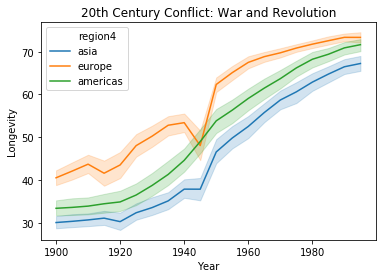

In [78]:
sns.lineplot(x='year', 
            y='longevity', # pop size may be better
            hue='region4',
            #size='pop',
            #sizes=(40, 400),
            data=df2[mask_region4]);

#plt.ylim([30, 90])
plt.title('20th Century Conflict: War and Revolution')
plt.xlabel("Year")
plt.ylabel("Longevity")

Text(1959, 40, 'Europe and Asia \npaid the highest price')

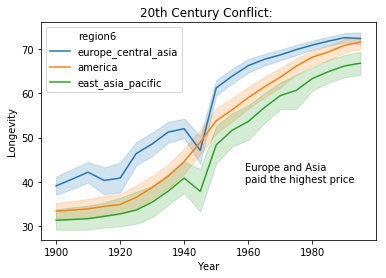

In [117]:
sns.lineplot(x='year', 
            y='longevity', # pop size may be better
            hue='region6',
            #size='pop',
            #sizes=(40, 400),
            data=df2[mask_region6]);

#plt.ylim([30, 90])
plt.title('20th Century Conflict: ')
plt.xlabel("Year")
plt.ylabel("Longevity")
plt.text(x=1959,y=40, s="Europe and Asia \npaid the highest price")

Text(0, 0.5, 'Population')

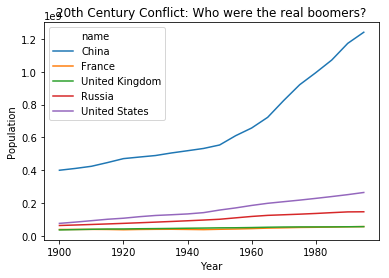

In [81]:
sns.lineplot(x='year', 
            y='pop', 
            hue='name',
            #size='pop',
            #sizes=(40, 400),
            data=df3);

#plt.ylim([30, 90])
plt.title('20th Century Conflict: Who were the real boomers?')
plt.xlabel("Year")
plt.ylabel("Population")
#plt.legend(labels = "Regions & Population Density");

Text(0, 0.5, 'Population')

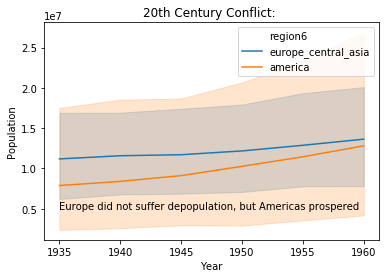

In [113]:
#plot df2
msk = (mask_region6) & (df2['region6'] != 'east_asia_pacific') & (mask_years3565) # filter out asia, zoom in on world wars
sns.lineplot(x='year', 
            y='pop', 
            hue='region6',
            #size='pop',
            #sizes=(40, 400),
            data=df2[msk]);

#plt.ylim([30, 90])
plt.title('20th Century Conflict: ')
plt.text(x=1935,y=5000000, s="Europe did not suffer depopulation, but Americas prospered")
plt.xlabel("Year")
plt.ylabel("Population")
#sns.add_legend(title="North Atlantic")

# STRETCH OPTIONS

## 1. Animate!

- [How to Create Animated Graphs in Python](https://towardsdatascience.com/how-to-create-animated-graphs-in-python-bb619cc2dec1)
- Try using [Plotly](https://plot.ly/python/animations/)!
- [The Ultimate Day of Chicago Bikeshare](https://chrisluedtke.github.io/divvy-data.html) (Lambda School Data Science student)
- [Using Phoebe for animations in Google Colab](https://colab.research.google.com/github/phoebe-project/phoebe2-docs/blob/2.1/tutorials/animations.ipynb)

## 2. Study for the Sprint Challenge

- Concatenate DataFrames
- Merge DataFrames
- Reshape data with `pivot_table()` and `.melt()`
- Be able to reproduce a FiveThirtyEight graph using Matplotlib or Seaborn.

## 3. Work on anything related to your portfolio site / Data Storytelling Project

In [0]:
# TODO